# Importing the libraries

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importing the dataset

In [3]:
dataset = pd.read_excel('DataSet_EU_3k_5k.xlsx')

# Understanding the dataset

First, we will understand the data by looking at the relations between different features of the dataset. We will be using correlation matrix to check the correlation between features. A more high and concentrated colour will show the more correlation with the target variable.

Correlation Matrix Heatmap

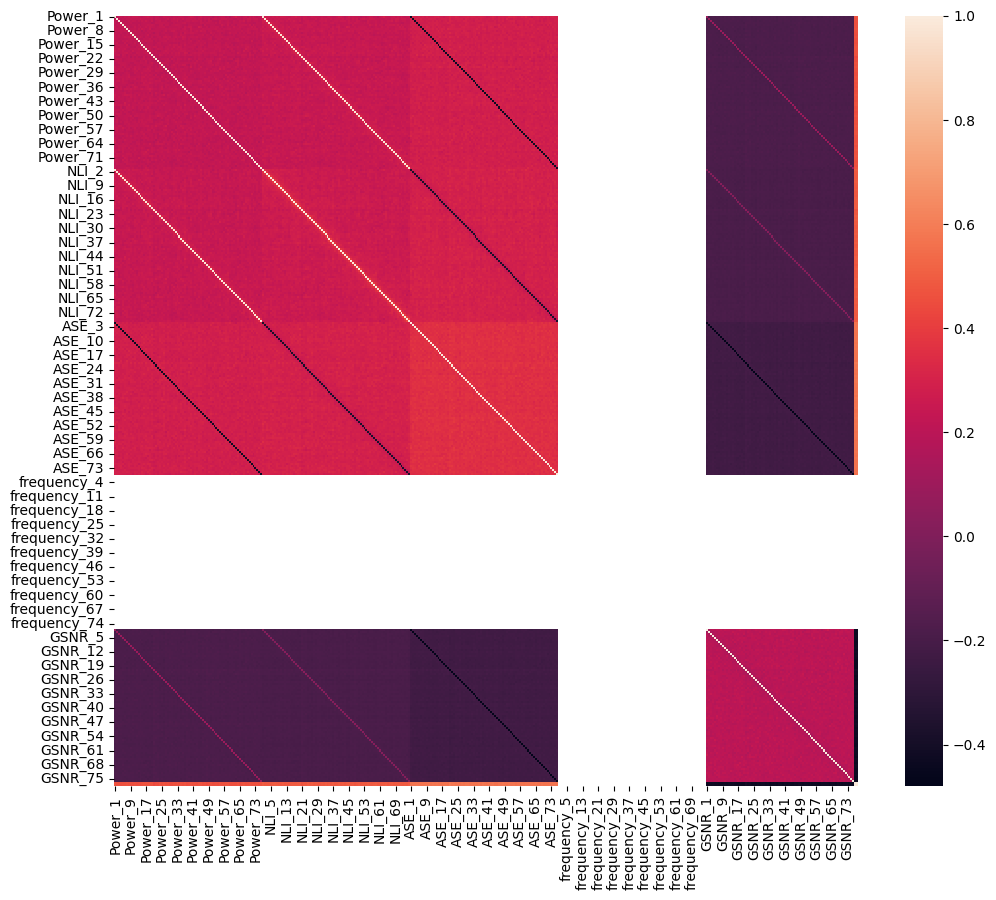

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr())
plt.show()

From the above plot we can see that frequency features has almost zero correlation with other features. But still we cannot clearly see what is going on exactly. So for a better understanding, we will be looking at some different channels to get a better view.

## Channel 1 

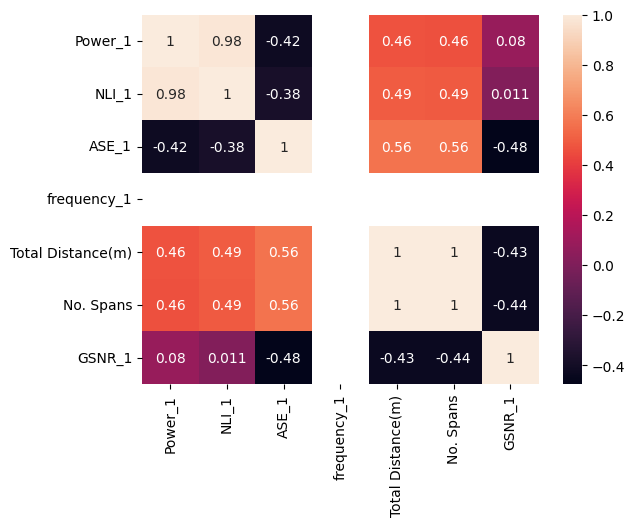

In [30]:
channel_1_columns = ['Power_1', 'NLI_1', 'ASE_1', 'frequency_1', 'Total Distance(m)', 'No. Spans', 'GSNR_1']
channel_1_data = dataset[channel_1_columns]
sns.heatmap(channel_1_data.corr(), annot=True)
plt.show()

## Channel 10

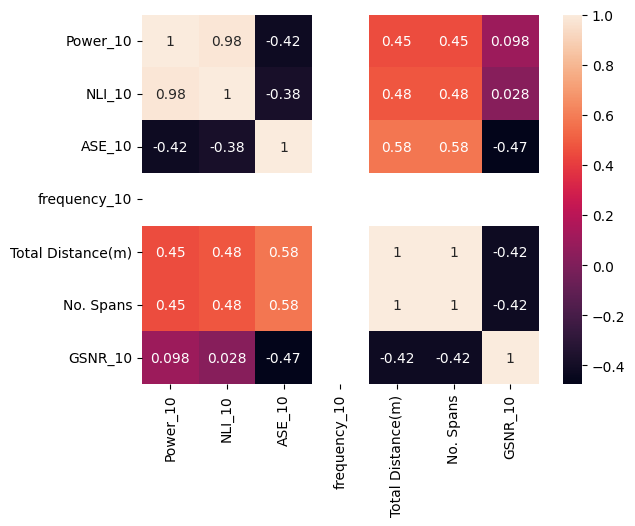

In [31]:
channel_10_columns = ['Power_10', 'NLI_10', 'ASE_10', 'frequency_10', 'Total Distance(m)', 'No. Spans', 'GSNR_10']
channel_10_data = dataset[channel_10_columns]
sns.heatmap(channel_10_data.corr(), annot=True)
plt.show()

## Channel 20

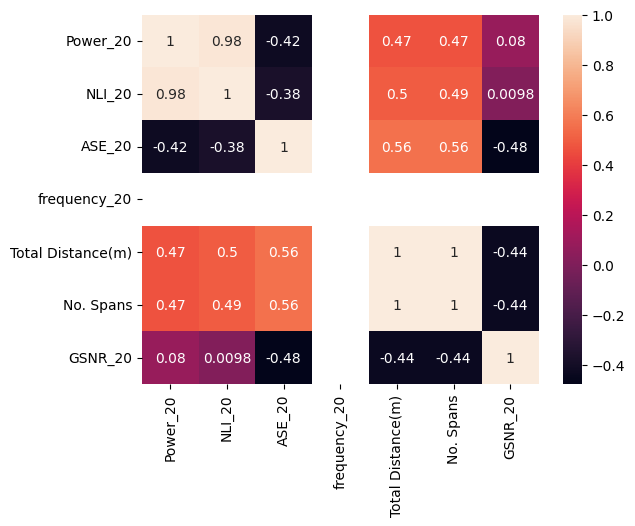

In [32]:
channel_20_columns = ['Power_20', 'NLI_20', 'ASE_20', 'frequency_20', 'Total Distance(m)', 'No. Spans', 'GSNR_20']
channel_20_data = dataset[channel_20_columns]
sns.heatmap(channel_20_data.corr(), annot=True)
plt.show()

## Channel 30

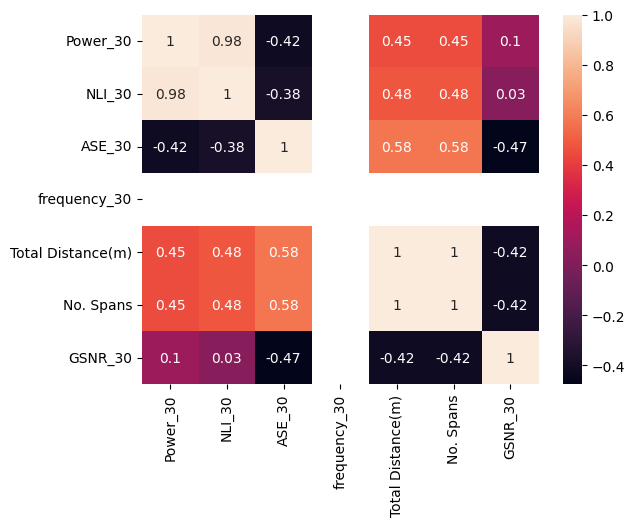

In [33]:
channel_30_columns = ['Power_30', 'NLI_30', 'ASE_30', 'frequency_30', 'Total Distance(m)', 'No. Spans', 'GSNR_30']
channel_30_data = dataset[channel_30_columns]
sns.heatmap(channel_30_data.corr(), annot=True)
plt.show()

## Channel 40

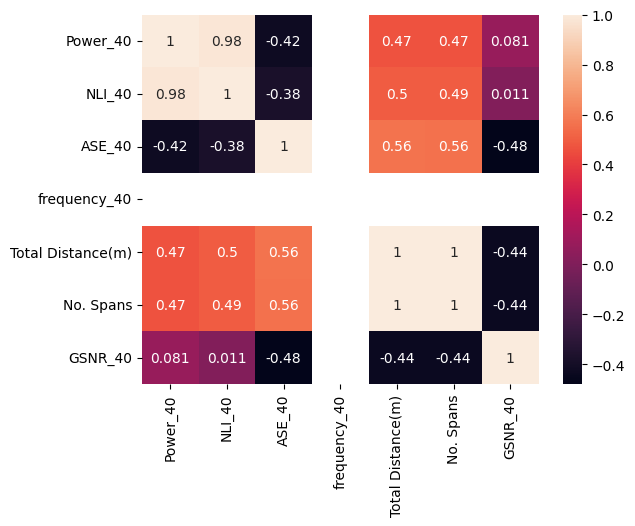

In [34]:
channel_40_columns = ['Power_40', 'NLI_40', 'ASE_40', 'frequency_40', 'Total Distance(m)', 'No. Spans', 'GSNR_40']
channel_40_data = dataset[channel_40_columns]
sns.heatmap(channel_40_data.corr(), annot=True)
plt.show()

## Channel 50

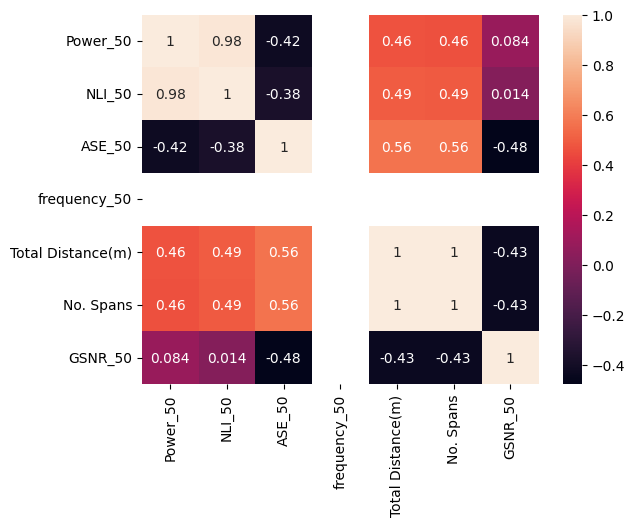

In [35]:
channel_50_columns = ['Power_50', 'NLI_50', 'ASE_50', 'frequency_50', 'Total Distance(m)', 'No. Spans', 'GSNR_50']
channel_50_data = dataset[channel_50_columns]
sns.heatmap(channel_50_data.corr(), annot=True)
plt.show()

## Conclusion
From the above different channel correlation plots, we can conclude that the frequency feature has almost zero significance which means we can discard this feature. But, before we discard any feature, we would like to apply different models and then we will decide whether feature selection is applicable or not.

# Data preprocessing

We will be using Channel 24.

In [11]:
channel_24_columns = ['Power_24', 'NLI_24', 'ASE_24', 'frequency_24', 'Total Distance(m)', 'No. Spans', 'GSNR_24']
data = dataset[channel_24_columns]

Display the first few rows of the dataset


In [12]:
data.head()

,Power_24,NLI_24,ASE_24,frequency_24,Total Distance(m),No. Spans,GSNR_24
0,0.000007,4.842871e-08,4.864403e-08,192450000000000,690608.0,8,76.723141
1,0.000007,3.885630e-08,5.247437e-08,192450000000000,690608.0,8,79.514276
2,0.000000,0.000000e+00,7.411925e-06,192450000000000,690608.0,8,0.000000
3,0.000000,0.000000e+00,7.423609e-06,192450000000000,690608.0,8,0.000000
4,0.000000,0.000000e+00,7.187909e-06,192450000000000,690608.0,8,0.000000


Checking data types of columns

In [13]:
data.dtypes

Power_24             float64
NLI_24               float64
ASE_24               float64
frequency_24           int64
Total Distance(m)    float64
No. Spans              int64
GSNR_24              float64
dtype: object

Summary statistics

In [14]:
data.describe()

,Power_24,NLI_24,ASE_24,frequency_24,Total Distance(m),No. Spans,GSNR_24
count,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,18000.00000,18000.000000
mean,0.000024,6.083256e-07,3.177172e-05,1.924500e+14,1.970755e+06,22.00000,15.672157
std,0.000038,1.071328e-06,4.231358e-05,0.000000e+00,1.023753e+06,11.41668,23.902547
min,0.000000,0.000000e+00,3.796777e-08,1.924500e+14,6.692970e+05,7.00000,0.000000
25%,0.000000,0.000000e+00,3.249564e-06,1.924500e+14,6.906080e+05,8.00000,0.000000
50%,0.000000,0.000000e+00,7.406459e-06,1.924500e+14,2.167932e+06,24.50000,0.000000
75%,0.000019,3.221394e-07,1.000000e-04,1.924500e+14,3.051078e+06,34.00000,17.120952
max,0.000095,3.670818e-06,1.000000e-04,1.924500e+14,3.077685e+06,34.00000,91.353745


Check for missing values

In [15]:
data.isnull().sum()

Power_24             0
NLI_24               0
ASE_24               0
frequency_24         0
Total Distance(m)    0
No. Spans            0
GSNR_24              0
dtype: int64

Visualizing the data

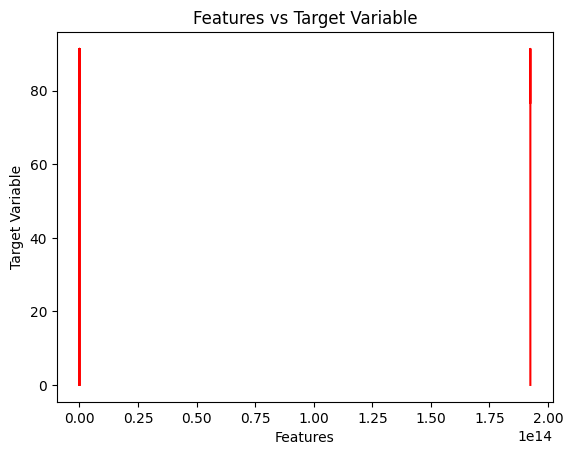

In [36]:
plt.plot(data.iloc[:, :-1].values, data.iloc[:, -1].values, color = 'red')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.title('Features vs Target Variable')
plt.show()

# Splitting dataset into training and test set

In [17]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [18]:
print(f'X size = {X.shape}\ny size = {y.shape}')

X size = (18000, 6)
y size = (18000,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f'X_train size = {X_train.shape}\ny_train size = {y_train.shape}\nX_test size = {X_test.shape}\ny_test size = {y_test.shape}')

X_train size = (14400, 6)
y_train size = (14400,)
X_test size = (3600, 6)
y_test size = (3600,)


# Applying feature scaling

In [21]:
sc = StandardScaler()
# X_scaled = sc.fit_transform(X)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
# print(f'X[0] = {X[0]}\nX_scaled[0] = {X_scaled[0]}')

In [23]:
print(f'X_train[0] = {X_train[0]}\nX_train_scaled[0] = {X_train_scaled[0]}')

X_train[0] = [7.33494511e-06 5.39951760e-08 4.64896996e-08 1.92450000e+14
 6.90608000e+05 8.00000000e+00]
X_train_scaled[0] = [-0.43357926 -0.51600236 -0.74863056  0.         -1.24578461 -1.22149915]


In [24]:
print(f'X_test[0] = {X_test[0]}\nX_test_scaled[0] = {X_test_scaled[0]}')

X_test[0] = [7.46224015e-06 4.62333751e-08 5.36407667e-08 1.92450000e+14
 6.90608000e+05 8.00000000e+00]
X_test_scaled[0] = [-0.43023209 -0.5232592  -0.74846147  0.         -1.24578461 -1.22149915]


# Model Selection and Training

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGB': XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} - MSE: {mean_squared_error(y_test, y_pred):.3f}, R2: {r2_score(y_test, y_pred):.3f}")


Linear Regression - MSE: 363.289, R2: 0.352
Support Vector Regression - MSE: 63.489, R2: 0.887
Decision Tree - MSE: 0.194, R2: 1.000
Random Forest - MSE: 0.074, R2: 1.000
XGB - MSE: 0.058, R2: 1.000


# Conclusion

- Support Vector Regression (SVR) has a significantly lower Mean Squared Error (MSE) and higher R-squared (R2) compared to Linear Regression, indicating much better performance.

- Decision Tree, Random Forest, Gradient Boosting (XGB) models all achieved near-perfect performance with extremely low MSE and R2 values of 1.

- Among all these models, Gradient Boosting had the lowest MSE, making it the best performing model overall.

- Additionally, we can remove less significant features from the dataset using a heatmap. However, since we are getting much excellent results, there is no need to do remove any feature at this point.
